In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


In [7]:
#Load csv files from path
bad_data_path = '/content/gdrive/MyDrive/ML/PPG_signal_data/bad_data.csv'
bad_label_path = '/content/gdrive/MyDrive/ML/PPG_signal_data/bad_label.csv'
good_data_path = '/content/gdrive/MyDrive/ML/PPG_signal_data/good_data.csv'
good_label_path = '/content/gdrive/MyDrive/ML/PPG_signal_data/good_label.csv'

In [8]:
# Read dataframe from csv_files
bad_data = pd.read_csv(bad_data_path)
bad_label = pd.read_csv(bad_label_path)
good_data = pd.read_csv(good_data_path)
good_label = pd.read_csv(good_label_path)

In [9]:
bad_data_arr = np.array(bad_data)
good_data_arr = np.array(good_data)

bad_label_arr = np.array(bad_label)
good_label_arr = np.array(good_label)
print(bad_data_arr.shape)
print(good_data_arr.shape)
print(bad_label_arr.shape)
print(good_label_arr.shape)
data_arr = np.concatenate((bad_data_arr, good_data_arr))
label_arr = np.concatenate((bad_label_arr, good_label_arr))
print(data_arr.shape)
print(label_arr.shape)

(948, 3000)
(999, 3000)
(948, 1)
(999, 1)
(1947, 3000)
(1947, 1)


In [10]:
print(data_arr)

[[-7.7974e+03 -7.8366e+03 -7.8642e+03 ... -1.8152e+03 -1.7715e+03
  -1.7280e+03]
 [ 1.1641e+02  4.9766e+00 -1.0717e+02 ... -7.6067e+03 -7.6829e+03
  -7.7463e+03]
 [ 6.1620e+02  6.2853e+02  6.4056e+02 ...  3.0771e+02  3.3302e+02
   3.5837e+02]
 ...
 [-9.4769e+02 -9.5937e+02 -9.7122e+02 ...  6.4617e+02  7.1347e+02
   7.7901e+02]
 [ 5.6185e+02  5.4872e+02  5.3526e+02 ...  2.9490e+02  3.0139e+02
   3.0793e+02]
 [-1.2257e+02 -1.3522e+02 -1.4801e+02 ... -8.3823e+02 -8.4691e+02
  -8.5546e+02]]


In [11]:
print(data_arr.shape)

(1947, 3000)


In [12]:
data = np.concatenate((data_arr,label_arr), axis = 1)
print(data)
print(data.shape)

[[-7.7974e+03 -7.8366e+03 -7.8642e+03 ... -1.7715e+03 -1.7280e+03
   0.0000e+00]
 [ 1.1641e+02  4.9766e+00 -1.0717e+02 ... -7.6829e+03 -7.7463e+03
   0.0000e+00]
 [ 6.1620e+02  6.2853e+02  6.4056e+02 ...  3.3302e+02  3.5837e+02
   0.0000e+00]
 ...
 [-9.4769e+02 -9.5937e+02 -9.7122e+02 ...  7.1347e+02  7.7901e+02
   1.0000e+00]
 [ 5.6185e+02  5.4872e+02  5.3526e+02 ...  3.0139e+02  3.0793e+02
   1.0000e+00]
 [-1.2257e+02 -1.3522e+02 -1.4801e+02 ... -8.4691e+02 -8.5546e+02
   1.0000e+00]]
(1947, 3001)


In [13]:
#Understanding the data
pd.DataFrame(data_arr).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
count,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.00000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,...,1947.000000,1947.000000,1947.000000,1947.00000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000
mean,54.169664,51.101969,48.097981,45.154474,42.278167,39.463322,36.718291,34.046297,31.443503,28.919069,26.466728,24.090693,21.799076,19.582572,17.452084,15.403832,13.441113,11.563693,9.778140,8.078997,6.471725,4.959079,3.541219,2.218206,0.988715,-0.137061,-1.172270,-2.099358,-2.922203,-3.649643,-4.271027,-4.783737,-5.19249,-5.489142,-5.681609,-5.769546,-5.739211,-5.602992,-5.354008,-4.993675,...,41.724078,37.996911,34.161483,30.22038,26.197639,22.095459,17.937507,13.734347,9.489351,5.226042,0.957063,-3.310580,-7.561181,-11.775937,-15.956318,-20.077653,-24.134195,-28.111082,-32.006180,-35.798224,-39.490275,-43.057675,-46.503961,-49.816629,-52.990049,-56.015471,-58.888154,-61.606352,-64.155749,-66.542447,-68.757137,-70.801321,-72.673027,-74.367901,-75.889883,-77.242304,-78.416637,-79.421566,-80.258703,-80.934151
std,5009.977236,4999.974572,4989.175246,4977.596130,4965.332146,4952.450145,4939.047136,4925.157629,4910.919948,4896.385177,4881.642348,4866.798273,4851.939501,4837.166746,4822.560038,4808.225366,4794.235510,4780.688533,4767.659908,4755.258329,4743.518714,4732.567312,4722.407843,4713.152328,4704.845225,4697.468465,4691.226805,4685.964770,4681.729142,4678.672131,4676.719326,4675.768971,4675.96006,4677.052735,4679.281109,4682.508029,4686.489711,4691.430214,4697.147961,4703.524902,...,4051.323506,4052.566178,4054.419714,4056.84614,4059.884345,4063.484282,4067.650493,4072.360596,4077.578022,4083.328072,4089.535137,4096.176398,4103.212102,4110.625443,4118.393990,4126.450509,4134.761096,4143.303574,4152.022091,4160.883396,4169.865870,4178.884048,4187.936998,4196.969663,4205.963483,4214.855731,4223.644784,4232.263206,4240.685165,4248.889359,4256.836384,4264.501482,4271.858970,4278.883941,4285.547406,4291.834100,4297.720237,4303.186908,4308.227430,4312.823620
min,-90792.000000,-89986.000000,-89139.000000,-88251.000000,-87325.000000,-86362.000000,-85424.000000,-86244.000000,-87068.000000,-87894.000000,-88720.000000,-89546.000000,-90369.000000,-91189.000000,-92004.000000,-92811.000000,-93610.000000,-94398.000000,-95173.000000,-95934.000000,-96677.000000,-97402.000000,-98105.000000,-98785.000000,-99438.000000,-100060.000000,-100660.000000,-101220.000000,-101740.000000,-102230.000000,-102680.000000,-103080.000000,-103440.00000,-103740.000000,-104000.000000,-104210.000000,-104350.000000,-104440.000000,-104470.000000,-104430.000000,...,-60135.000000,-60795.000000,-61460.000000,-62128.00000,-62799.000000,-63470.000000,-64139.000000,-64805.000000,-65466.000000,-66121.000000,-66766.000000,-67400.000000,-68021.000000,-68626.000000,-69213.000000,-69780.000000,-70324.000000,-70842.000000,-71333.000000,-71793.000000,-72221.000000,-72612.000000,-72966.000000,-73279.000000,-73549.000

In [14]:
df = pd.DataFrame(data)

In [15]:
# print(df.shape)
# print(df.head())
print(df)

         0          1        2        3     ...      2997      2998      2999  3000
0    -7797.40 -7836.6000 -7864.20 -7880.70  ... -1815.200 -1771.500 -1728.000   0.0
1      116.41     4.9766  -107.17  -219.84  ... -7606.700 -7682.900 -7746.300   0.0
2      616.20   628.5300   640.56   652.28  ...   307.710   333.020   358.370   0.0
3      973.76   980.4300   986.72   992.63  ...   531.950   551.560   570.870   0.0
4      746.40   736.2100   725.91   715.48  ...   124.180   121.590   119.170   0.0
...       ...        ...      ...      ...  ...       ...       ...       ...   ...
1942   930.41   910.3300   890.94   872.27  ...    77.799    66.739    56.536   1.0
1943   346.54   329.9300   312.93   295.57  ...  -550.820  -556.950  -563.020   1.0
1944  -947.69  -959.3700  -971.22  -983.20  ...   646.170   713.470   779.010   1.0
1945   561.85   548.7200   535.26   521.47  ...   294.900   301.390   307.930   1.0
1946  -122.57  -135.2200  -148.01  -160.96  ...  -838.230  -846.910  -855.46

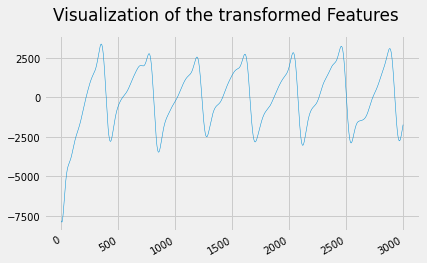

In [16]:
#Visualize a sample
plt.style.use('fivethirtyeight')
df.iloc[0, :-1].plot(subplots=True,
                  fontsize=10, 
                  linewidth=0.5, 
                  title='Visualization of the transformed Features')
plt.show()

In [17]:
#Shuffling the dataframe
from sklearn.utils import shuffle
df = shuffle(df)
print(df.head())

         0         1         2         3     ...     2997     2998     2999  3000
1612   267.26   271.100   274.020   275.970  ...  -564.28  -560.41  -556.21   1.0
1403 -4304.20 -4291.500 -4269.200 -4236.700  ...  -704.59  -740.37  -776.00   1.0
974   1339.10  1334.800  1329.200  1322.200  ...  2732.30  2746.60  2758.00   1.0
1055   787.08   747.710   706.390   663.290  ...  1187.10  1471.50  1752.20   1.0
307   -109.52   -92.397   -74.586   -56.054  ...  2143.60  2157.20  2170.80   0.0

[5 rows x 3001 columns]


In [18]:
# print(x)

In [19]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [20]:
X= df.iloc[:,:-1]
print(X)
X.shape

          0         1          2     ...     2997     2998     2999
1612   267.260   271.100   274.0200  ...  -564.28  -560.41  -556.21
1403 -4304.200 -4291.500 -4269.2000  ...  -704.59  -740.37  -776.00
974   1339.100  1334.800  1329.2000  ...  2732.30  2746.60  2758.00
1055   787.080   747.710   706.3900  ...  1187.10  1471.50  1752.20
307   -109.520   -92.397   -74.5860  ...  2143.60  2157.20  2170.80
...        ...       ...        ...  ...      ...      ...      ...
1130  -248.920  -257.120  -265.1700  ...   965.49   968.37   969.34
1294  -329.100  -326.640  -323.5800  ...  -328.70  -331.60  -334.39
860    -71.126   -31.600     6.1917  ...   311.78   308.29   305.47
1459  -374.540  -371.820  -369.1800  ...  -634.59  -609.54  -582.42
1126  -233.610  -237.380  -241.0400  ...  1087.30  1102.10  1114.30

[1947 rows x 3000 columns]


(1947, 3000)

In [21]:
y = df.iloc[:,-1].values
print(y)
y.shape

[1. 1. 1. ... 0. 1. 1.]


(1947,)

In [22]:
from sklearn.model_selection import train_test_split
X = np.array(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [23]:
print(X.shape[1])
print(x_train.shape)
print(x_train)

3000
(1557, 3000)
[[  371.13   382.86   394.87 ... -1088.7  -1103.9  -1119.2 ]
 [-1282.1  -1294.6  -1307.4  ...  -745.39  -751.58  -757.98]
 [ 1265.9   1266.4   1266.   ...   378.67   327.31   276.03]
 ...
 [  737.82   725.61   712.97 ...  -686.31  -711.19  -735.79]
 [  980.75   977.46   972.87 ... -2027.2  -1993.1  -1961.2 ]
 [  310.79   259.12   207.22 ...   889.61   850.79   811.65]]


In [24]:
x_train = np.reshape(x_train, (x_train.shape[0],3000, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 3000, 1))
print(x_train.shape)
print(y_train.shape)
print(y_train)
print(x_test.shape)
print(y_test.shape)

(1557, 3000, 1)
(1557,)
[0. 1. 0. ... 1. 0. 1.]
(390, 3000, 1)
(390,)


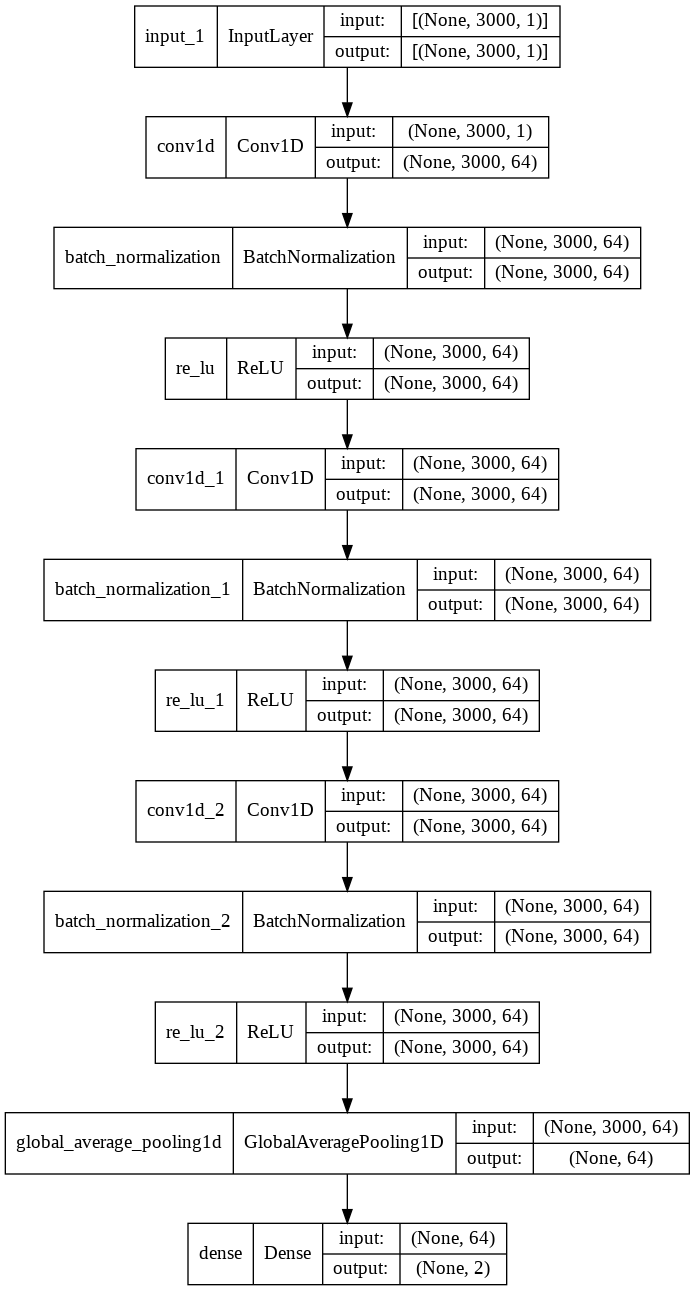

In [25]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
num_classes = 2 


def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="sigmoid")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=(3000, 1))
keras.utils.plot_model(model, show_shapes=True)

In [26]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
39/39 [==============================] - 16s 72ms/step - loss: 0.5282 - sparse_categorical_accuracy: 0.8104 - val_loss: 0.6962 - val_sparse_categorical_accuracy: 0.6731 - lr: 0.0010
Epoch 2/500
39/39 [==============================] - 2s 63ms/step - loss: 0.3545 - sparse_categorical_accuracy: 0.9430 - val_loss: 0.5411 - val_sparse_categorical_accuracy: 0.8301 - lr: 0.0010
Epoch 3/500
39/39 [==============================] - 2s 59ms/step - loss: 0.2349 - sparse_categorical_accuracy: 0.9695 - val_loss: 0.4574 - val_sparse_categorical_accuracy: 0.7853 - lr: 0.0010
Epoch 4/500
39/39 [==============================] - 2s 64ms/step - loss: 0.1993 - sparse_categorical_accuracy: 0.9687 - val_loss: 0.3727 - val_sparse_categorical_accuracy: 0.9103 - lr: 0.0010
Epoch 5/500
39/39 [==============================] - 2s 59ms/step - loss: 0.1820 - sparse_categorical_accuracy: 0.9655 - val_loss: 0.5816 - val_sparse_categorical_accuracy: 0.6058 - lr: 0.0010
Epoch 6/500
39/39 [===============

In [27]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

13/13 [==============================] - 1s 25ms/step - loss: 0.0057 - sparse_categorical_accuracy: 1.0000
Test accuracy 1.0
Test loss 0.005740433465689421


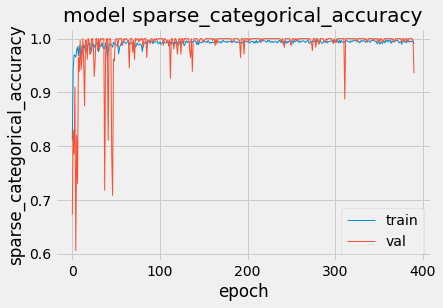

In [28]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric], linewidth=1)
plt.plot(history.history["val_" + metric], linewidth=1)
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [29]:
model.save('fully_CNN_model.h5')